# **1. Part 1 - Unification**

In [4]:
def unify(p1, p2):
    f1, f2 = p1.split("(")[0], p2.split("(")[0]
    if f1 != f2: return "Cannot be unified"

    a1, a2 = p1[p1.find("(")+1:-1].split(","), p2[p2.find("(")+1:-1].split(",")
    if len(a1) != len(a2): return "Cannot be unified"

    subs = {}
    for x, y in zip(a1, a2):
        x, y = x.strip(), y.strip()
        if x == y: continue
        if x.islower(): subs[x] = y
        elif y.islower(): subs[y] = x
        else: return "Cannot be unified"

    return subs or "Already unified"

print("\n⋅˚.⋆☾⁺₊ ‧  Unification ⋅˚.⋆☾⁺₊ ‧ ")
print(unify("Eligible(x)", "Eligible(Ana)"))


⋅˚.⋆☾⁺₊ ‧  Unification ⋅˚.⋆☾⁺₊ ‧ 
{'x': 'Ana'}


# **Part 2 - Forward Chaining**

In [3]:
facts = [
    "HighGrades(Juan)",
    "Applied(Juan)",
    "HighGrades(Maria)",
    "DidNotApply(Maria)",
    "StudentLeader(Carlos)",
    "NoHighGrades(Carlos)",
    "HighGrades(Ana)",
    "StudentLeader(Ana)",
    "Applied(Ana)",
]

rules = [
    (["HighGrades", "StudentLeader", "Applied"], "Eligible"),
    (["Eligible"], "Scholarship"),
    (["Scholarship"], "FinancialSupport"),
]

seen = set(facts)
ordered_facts = list(facts)

persons = []
for f in facts:
    name = f[f.find("(")+1:-1]
    if name not in persons:
        persons.append(name)

print("⋅˚.⋆☾⁺₊ ‧  Forward Chaining ⋅˚.⋆☾⁺₊ ‧ ")

changed = True
while changed:
    changed = False
    for person in persons:
        for antecedents, consequent in rules:
            if all(f"{ant}({person})" in seen for ant in antecedents):
                new_fact = f"{consequent}({person})"
                if new_fact not in seen:
                    seen.add(new_fact)
                    ordered_facts.append(new_fact)
                    changed = True
                    print(f"Derived {new_fact} because", " ∧ ".join(f"{ant}({person})" for ant in antecedents))

print("\n⋅˚.⋆☾⁺₊ ‧  Final Facts (preserved order) ⋅˚.⋆☾⁺₊ ‧ ")
for f in ordered_facts:
    print("-", f)

initial = set(facts)
derived_juan = [f for f in ordered_facts if f.endswith("(Juan)") and f not in initial]
derived_ana  = [f for f in ordered_facts if f.endswith("(Ana)") and f not in initial]

print("\nNew facts derived for Juan:", derived_juan or "None")
print("New facts derived for Ana:", derived_ana or "None")

print("\n⋅˚.⋆☾⁺₊ ‧  Explanation ⋅˚.⋆☾⁺₊ ‧ ")
print("Maria and Carlos is not Eligible as Maria only has High Grades and didn't apply for the scholarship and Carlos doesn't acquire all the qualifications as he's only a Student Leader and don't have high grades.")


⋅˚.⋆☾⁺₊ ‧  Forward Chaining ⋅˚.⋆☾⁺₊ ‧ 
Derived Eligible(Ana) because HighGrades(Ana) ∧ StudentLeader(Ana) ∧ Applied(Ana)
Derived Scholarship(Ana) because Eligible(Ana)
Derived FinancialSupport(Ana) because Scholarship(Ana)

⋅˚.⋆☾⁺₊ ‧  Final Facts (preserved order) ⋅˚.⋆☾⁺₊ ‧ 
- HighGrades(Juan)
- Applied(Juan)
- HighGrades(Maria)
- DidNotApply(Maria)
- StudentLeader(Carlos)
- NoHighGrades(Carlos)
- HighGrades(Ana)
- StudentLeader(Ana)
- Applied(Ana)
- Eligible(Ana)
- Scholarship(Ana)
- FinancialSupport(Ana)

New facts derived for Juan: None
New facts derived for Ana: ['Eligible(Ana)', 'Scholarship(Ana)', 'FinancialSupport(Ana)']

⋅˚.⋆☾⁺₊ ‧  Explanation ⋅˚.⋆☾⁺₊ ‧ 
Maria and Carlos is not Eligible as Maria only has High Grades and didn't apply for the scholarship and Carlos doesn't acquire all the qualifications as he's only a Student Leader and don't have high grades.


# **Part 3 - Backward Chaining**

In [5]:
facts = {
    "HighGrades(Juan)",
    "Applied(Juan)",
    "HighGrades(Maria)",
    "DidNotApply(Maria)",
    "StudentLeader(Carlos)",
    "NoHighGrades(Carlos)",
    "HighGrades(Ana)",
    "StudentLeader(Ana)",
    "Applied(Ana)"
}

rules = [
    (["HighGrades(x)", "StudentLeader(x)", "Applied(x)"], "Eligible(x)"),
    (["Eligible(x)"], "Scholarship(x)"),
    (["Scholarship(x)"], "FinancialSupport(x)")
]

def prove(goal):
    if goal in facts:
        return True

    pred = goal.split("(")[0]
    name = goal[goal.find("(")+1:-1]

    for premises, conclusion in rules:
        if conclusion.startswith(pred):
            if all(prove(p.replace("x", name)) for p in premises):
                return True

    return False

print("\n⋅˚.⋆☾⁺₊ ‧ Backward Chaining ⋅˚.⋆☾⁺₊ ‧ ")

print("Goal: Scholarship(Maria) =", "YES" if prove("Scholarship(Maria)") else "NO")
print("Goal: FinancialSupport(Ana) =", "YES" if prove("FinancialSupport(Ana)") else "NO")



⋅˚.⋆☾⁺₊ ‧ Backward Chaining ⋅˚.⋆☾⁺₊ ‧ 
Goal: Scholarship(Maria) = NO
Goal: FinancialSupport(Ana) = YES


# **# Part 4 - Validity Check**
---
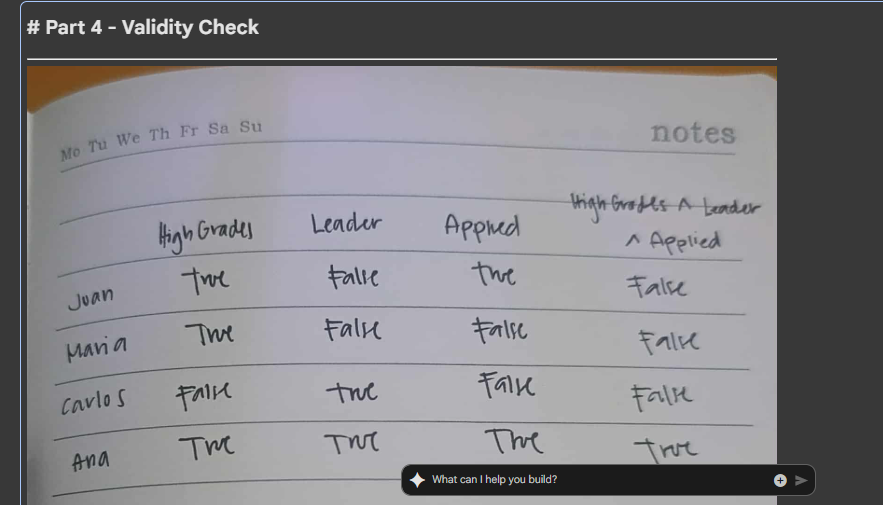


# **# Part 5 - Reflection**
---
`Logical Reasoning aims to validate from given facts and information for better decision-making. In making real-life decisions, it aids people to be rational and practice critical thinking as Logical Reasoning allows people to carefully evaluate evidence, detect biases, and avoid emotional or impulsive decisions. In ethical Ai, Logical Reasoning helps in deriving new information from given data, facts, and information to form a conclusion and help it's user. All in all, Logical Reasoning provides a good support in both AI and in making real life decisions`



